Challenge URL https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/demographic-data-analyzer <br>

Assignment: Demographic Data Analyzer<br><br>
In this challenge you must analyze demographic data using Pandas. You are given a dataset of demographic data that was extracted from the 1994 Census database.<br><br>
You must use Pandas to answer the following questions:<br><br>

How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)<br><br>
What is the average age of men?<br><br>
What is the percentage of people who have a Bachelor's degree?<br><br>
What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?<br><br>
What percentage of people without advanced education make more than 50K?<br><br>
What is the minimum number of hours a person works per week?<br><br>
What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?<br><br>
What country has the highest percentage of people that earn >50K and what is that percentage?<br><br>
Identify the most popular occupation for those who earn >50K in India.<br><br>
Use the starter code in the file demographic_data_analyzer. Update the code so all variables set to "None" are set to the appropriate calculation or code. Round all decimals to the nearest tenth.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [17]:
dataframe = pd.read_csv('adult.data.csv')

def calculate_demographic_data(print_data=True):
    # Read data from file
    dataframe = pd.read_csv('adult.data.csv')

    # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    race_count =  dataframe.race.value_counts()

    # What is the average age of men?
    average_age_men = round(dataframe[dataframe['sex'] == 'Male']['age'].mean(),1)

    # What is the percentage of people who have a Bachelor's degree?
    percentage_bachelors = round(((dataframe.education.values == 'Bachelors').sum()/ dataframe.education.count())*100,1)

    # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?

    # percentage with salary >50K
    higher_education_rich = round(len(dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K'])/len(dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])])*100,1)
    lower_education_rich = round(len(dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K'])/len(dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])])*100,1)
  

    # What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = dataframe['hours-per-week'].min()

    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    rich_percentage = round(len(dataframe.loc[dataframe['hours-per-week']<=dataframe['hours-per-week'].min()][dataframe['salary']=='>50K'])/len(dataframe[dataframe['hours-per-week'] == dataframe['hours-per-week'].min()])*100,1)

    # What country has the highest percentage of people that earn >50K?
    
    # its a bit slow but i could not think of a more efficient solution
    a = dataframe.loc[dataframe['salary']=='>50K']['native-country'].value_counts().keys()
    d = []
    for i in a:
        b = dataframe.loc[dataframe['salary']=='>50K']['native-country'].value_counts()[i]
        c = dataframe['native-country'].value_counts()[i]
        d.append(b/c)
    maximum_value = d[0]
    for i in d:
        if(i>maximum_value):
            maximum_value = i

    highest_earning_country = a[d.index(maximum_value)]
    highest_earning_country_percentage = round(maximum_value*100,1)

    # Identify the most popular occupation for those who earn >50K in India.
    top_IN_occupation = dataframe.loc[dataframe['salary']=='>50K'][dataframe['native-country']=='India']['occupation'].mode()[0]

    # DO NOT MODIFY BELOW THIS LINE

    if print_data:
        print("Number of each race:\n", race_count) 
        print("Average age of men:", average_age_men)
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)

    return {
        'race_count': race_count,
        'average_age_men': average_age_men,
        'percentage_bachelors': percentage_bachelors,
        'higher_education_rich': higher_education_rich,
        'lower_education_rich': lower_education_rich,
        'min_work_hours': min_work_hours,
        'rich_percentage': rich_percentage,
        'highest_earning_country': highest_earning_country,
        'highest_earning_country_percentage':
        highest_earning_country_percentage,
        'top_IN_occupation': top_IN_occupation
    }

 python main.py
/home/runner/boilerplate-demographic-data-analyzer/demographic_data_analyzer.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  higher_education_rich = round(len(dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K'])/len(dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])])*100,1)
/home/runner/boilerplate-demographic-data-analyzer-7/demographic_data_analyzer.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lower_education_rich = round(len(dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K'])/len(dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])])*100,1)
/home/runner/boilerplate-demographic-data-analyzer-7/demographic_data_analyzer.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rich_percentage = round(len(dataframe.loc[dataframe['hours-per-week']<=dataframe['hours-per-week'].min()][dataframe['salary']=='>50K'])/len(dataframe[dataframe['hours-per-week'] == dataframe['hours-per-week'].min()])*100,1)
/home/runner/boilerplate-demographic-data-analyzer-7/demographic_data_analyzer.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_IN_occupation = dataframe.loc[dataframe['salary']=='>50K'][dataframe['native-country']=='India']['occupation'].mode()[0]
Number of each race:
 White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
Average age of men: 39.4
Percentage with Bachelors degrees: 16.4%
Percentage with higher education that earn >50K: 46.5%
Percentage without higher education that earn >50K: 17.4%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 10.0%
Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 41.9%
Top occupations in India: Prof-specialty
/home/runner/boilerplate-demographic-data-analyzer-7/demographic_data_analyzer.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  higher_education_rich = round(len(dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K'])/len(dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])])*100,1)
/home/runner/boilerplate-demographic-data-analyzer-7/demographic_data_analyzer.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lower_education_rich = round(len(dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K'])/len(dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])])*100,1)
/home/runner/boilerplate-demographic-data-analyzer-7/demographic_data_analyzer.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rich_percentage = round(len(dataframe.loc[dataframe['hours-per-week']<=dataframe['hours-per-week'].min()][dataframe['salary']=='>50K'])/len(dataframe[dataframe['hours-per-week'] == dataframe['hours-per-week'].min()])*100,1)
/home/runner/boilerplate-demographic-data-analyzer-7/demographic_data_analyzer.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_IN_occupation = dataframe.loc[dataframe['salary']=='>50K'][dataframe['native-country']=='India']['occupation'].mode()[0]
..........
----------------------------------------------------------------------
Ran 10 tests in 16.551s

OK
 



<hr>
<h1>Data Visualization</h1>

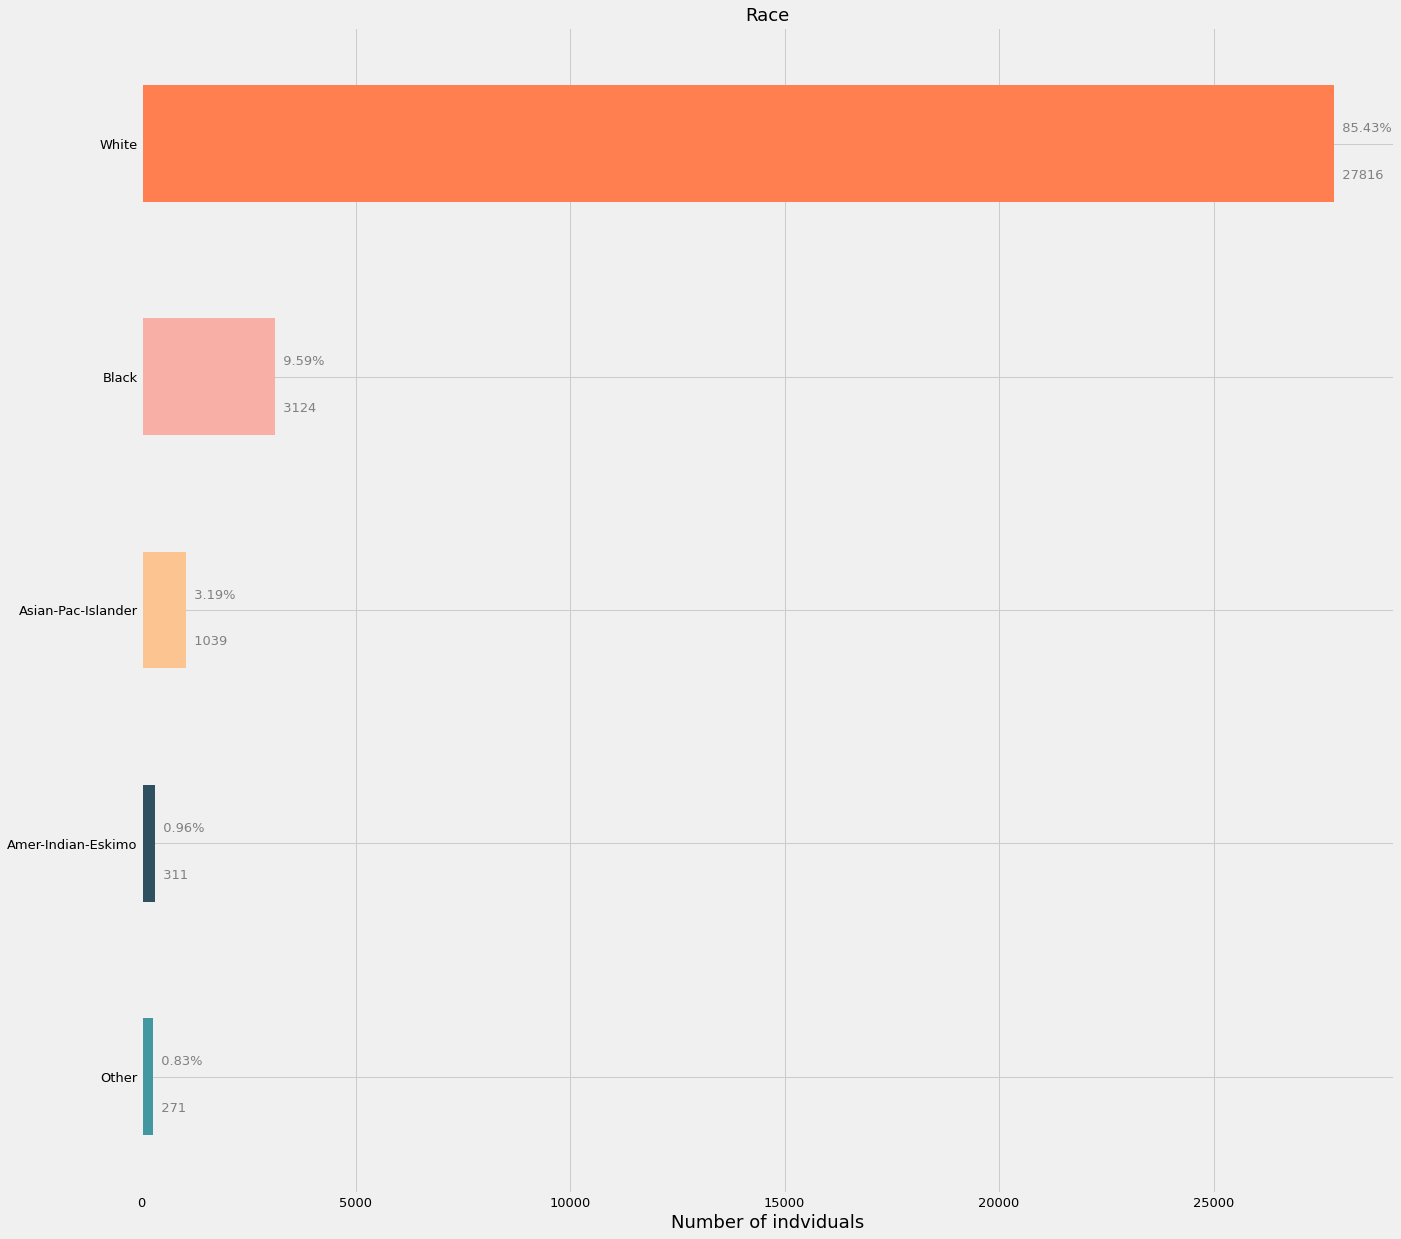

In [18]:
dataframe = pd.read_csv('adult.data.csv')
race_data_barh_graph = dataframe['race'].value_counts().plot(kind='barh', color=["coral","#F8AFA6","#FBC490","#2F5061","#4297A0"], fontsize=13,figsize=(20,20));
race_data_barh_graph.set_title("Race", fontsize=18)
race_data_barh_graph.set_xlabel("Number of indviduals", fontsize=18);
totals = []
for i in race_data_barh_graph.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in race_data_barh_graph.patches:
    race_data_barh_graph.text(i.get_width()+.40, i.get_y()+.40, \
            "  "+str(round(i.get_width())), fontsize=13,color='grey')
for i in race_data_barh_graph.patches:
    race_data_barh_graph.text(i.get_width()+.20, i.get_y()+.20, \
            "  "+str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,color='grey')
race_data_barh_graph.invert_yaxis()
plt.style.use('fivethirtyeight')

<ipython-input-19-d732d4c8c9e1>:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(sex_pie_chart,loc="lower left",labels=['Male','Female'])


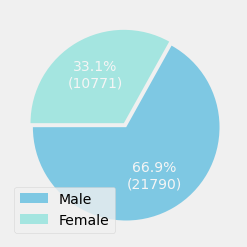

In [19]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)
sex_pie_chart = plt.pie(dataframe['sex'].value_counts(),colors=['#7EC8E3','#A4E5E0'], autopct=lambda pct: func(pct, dataframe['sex'].value_counts()), startangle=180,explode=(0.05, 0),textprops=dict(color="whitesmoke"))
plt.legend(sex_pie_chart,loc="lower left",labels=['Male','Female'])
plt.style.use('fivethirtyeight')  

In [20]:
male_age_mean = round(dataframe[dataframe['sex'] == 'Male']['age'].mean(),2)
female_age_mean = round(dataframe[dataframe['sex'] == 'Female']['age'].mean(),2)
print("Average male age "+str(male_age_mean))
print("Average female age "+str(female_age_mean))

Average male age 39.43
Average female age 36.86


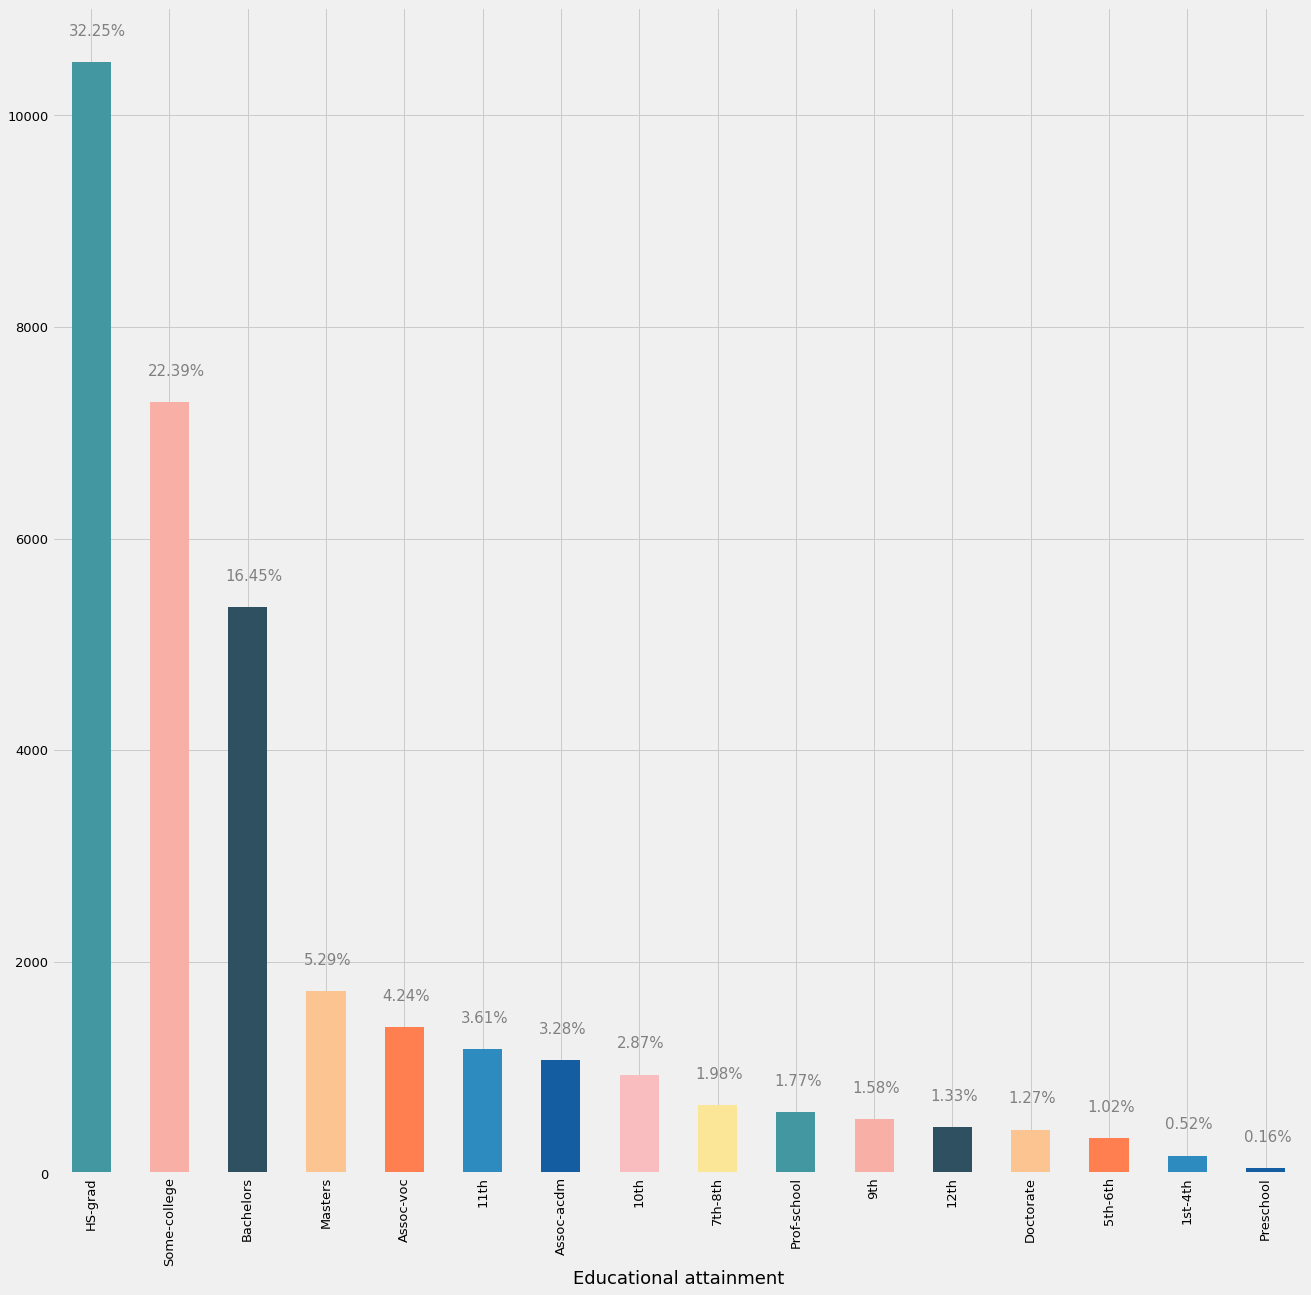

In [21]:
education_data_bar_graph = dataframe['education'].value_counts().plot(kind='bar', color=["#4297A0","#F8AFA6","#2F5061","#FBC490","coral","#2E8BC0","#145DA0","#F9BDC0","#FBE698"], fontsize=13,figsize=(20,20));
education_data_bar_graph.set_xlabel("Educational attainment", fontsize=18)
totals = []
for i in education_data_bar_graph.patches:
    totals.append(i.get_height())
total = sum(totals)

for i in education_data_bar_graph.patches:
   education_data_bar_graph.text(i.get_x()-.03, i.get_height()+250, \
           str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='grey')
plt.style.use('fivethirtyeight')

<ipython-input-22-a54f6e7c38ca>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Salary less or equal to $50K a year': [len(dataframe.loc[dataframe['sex']=='Male'][dataframe['salary']=='<=50K']), len(dataframe.loc[dataframe['sex']=='Female'][dataframe['salary']=='<=50K'])],
<ipython-input-22-a54f6e7c38ca>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Salary greater than $50K a year': [len(dataframe.loc[dataframe['sex']=='Male'][dataframe['salary']=='>50K']), len(dataframe.loc[dataframe['sex']=='Female'][dataframe['salary']=='>50K'])]


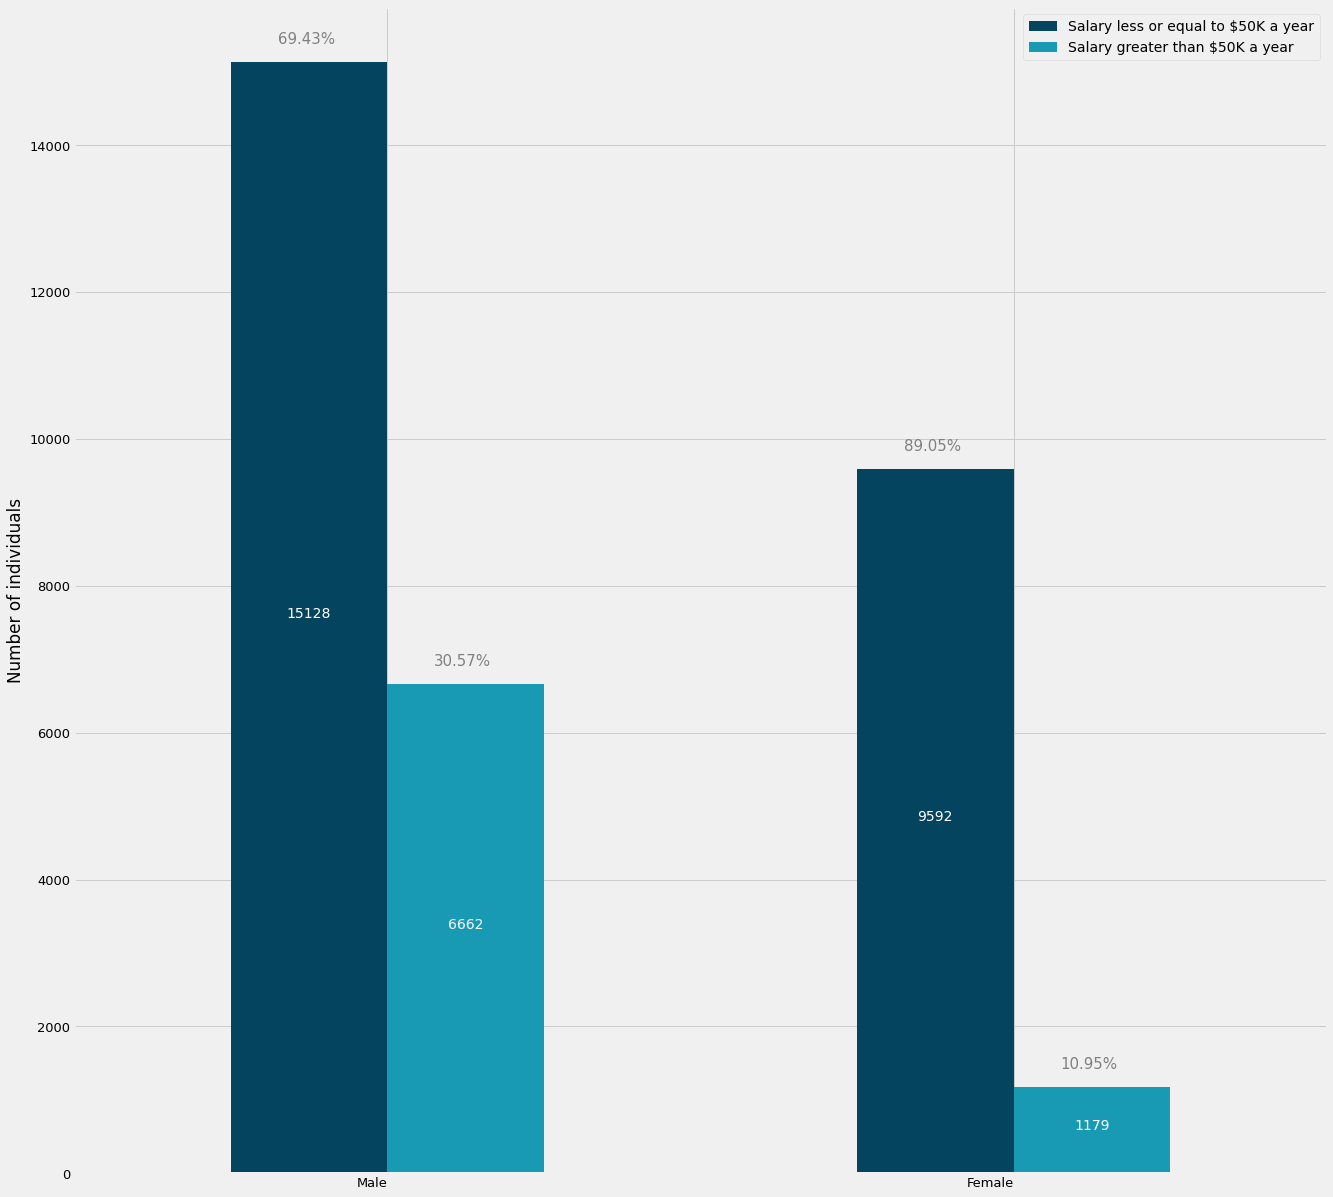

In [22]:
data = pd.DataFrame({'sex': ['Male','Female'],
                     'Salary less or equal to $50K a year': [len(dataframe.loc[dataframe['sex']=='Male'][dataframe['salary']=='<=50K']), len(dataframe.loc[dataframe['sex']=='Female'][dataframe['salary']=='<=50K'])],
                     'Salary greater than $50K a year': [len(dataframe.loc[dataframe['sex']=='Male'][dataframe['salary']=='>50K']), len(dataframe.loc[dataframe['sex']=='Female'][dataframe['salary']=='>50K'])]
                     })
male_quantity_of_individuals = len(dataframe.loc[dataframe['sex']=='Male'])
female_quantity_of_individuals = len(dataframe.loc[dataframe['sex']=='Female'])
                    
sex_salary_bar_graph = data.plot(kind='bar', figsize=(20,20), width=0.5,fontsize=13,color=['#05445E','#189AB4'])
sex_salary_bar_graph.set_ylabel('Number of individuals')   
sex_salary_bar_graph.set_xticklabels(labels=['Male','Female'])
for label in sex_salary_bar_graph.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(0)

sex_salary_bar_graph.text(sex_salary_bar_graph.patches[0].get_x()+.075, sex_salary_bar_graph.patches[0].get_height()+250, \
           str(round(sex_salary_bar_graph.patches[0].get_height()/male_quantity_of_individuals*100, 2))+'%', fontsize=15,
                color='grey')
sex_salary_bar_graph.text(sex_salary_bar_graph.patches[2].get_x()+.075, sex_salary_bar_graph.patches[2].get_height()+250, \
           str(round(sex_salary_bar_graph.patches[2].get_height()/male_quantity_of_individuals*100, 2))+'%', fontsize=15,
                color='grey')
sex_salary_bar_graph.text(sex_salary_bar_graph.patches[1].get_x()+.075, sex_salary_bar_graph.patches[1].get_height()+250, \
           str(round(sex_salary_bar_graph.patches[1].get_height()/female_quantity_of_individuals*100, 2))+'%', fontsize=15,
                color='grey')                                   
sex_salary_bar_graph.text(sex_salary_bar_graph.patches[3].get_x()+.075, sex_salary_bar_graph.patches[3].get_height()+250, \
           str(round(sex_salary_bar_graph.patches[3].get_height()/female_quantity_of_individuals*100, 2))+'%', fontsize=15,
                color='grey')  
sex_salary_bar_graph.text(sex_salary_bar_graph.patches[0].get_x()/2, sex_salary_bar_graph.patches[0].get_height()//2,sex_salary_bar_graph.patches[0].get_height(),ha = 'center',color = 'white')
sex_salary_bar_graph.text(sex_salary_bar_graph.patches[1].get_x()+.125, sex_salary_bar_graph.patches[1].get_height()//2,sex_salary_bar_graph.patches[1].get_height(),ha = 'center',color = 'white')  
sex_salary_bar_graph.text(sex_salary_bar_graph.patches[2].get_x()+.125, sex_salary_bar_graph.patches[2].get_height()//2,sex_salary_bar_graph.patches[2].get_height(),ha = 'center',color = 'white')      
sex_salary_bar_graph.text(sex_salary_bar_graph.patches[3].get_x()+.125, sex_salary_bar_graph.patches[3].get_height()//2,sex_salary_bar_graph.patches[3].get_height(),ha = 'center',color = 'white')     
plt.style.use('fivethirtyeight')                                                      

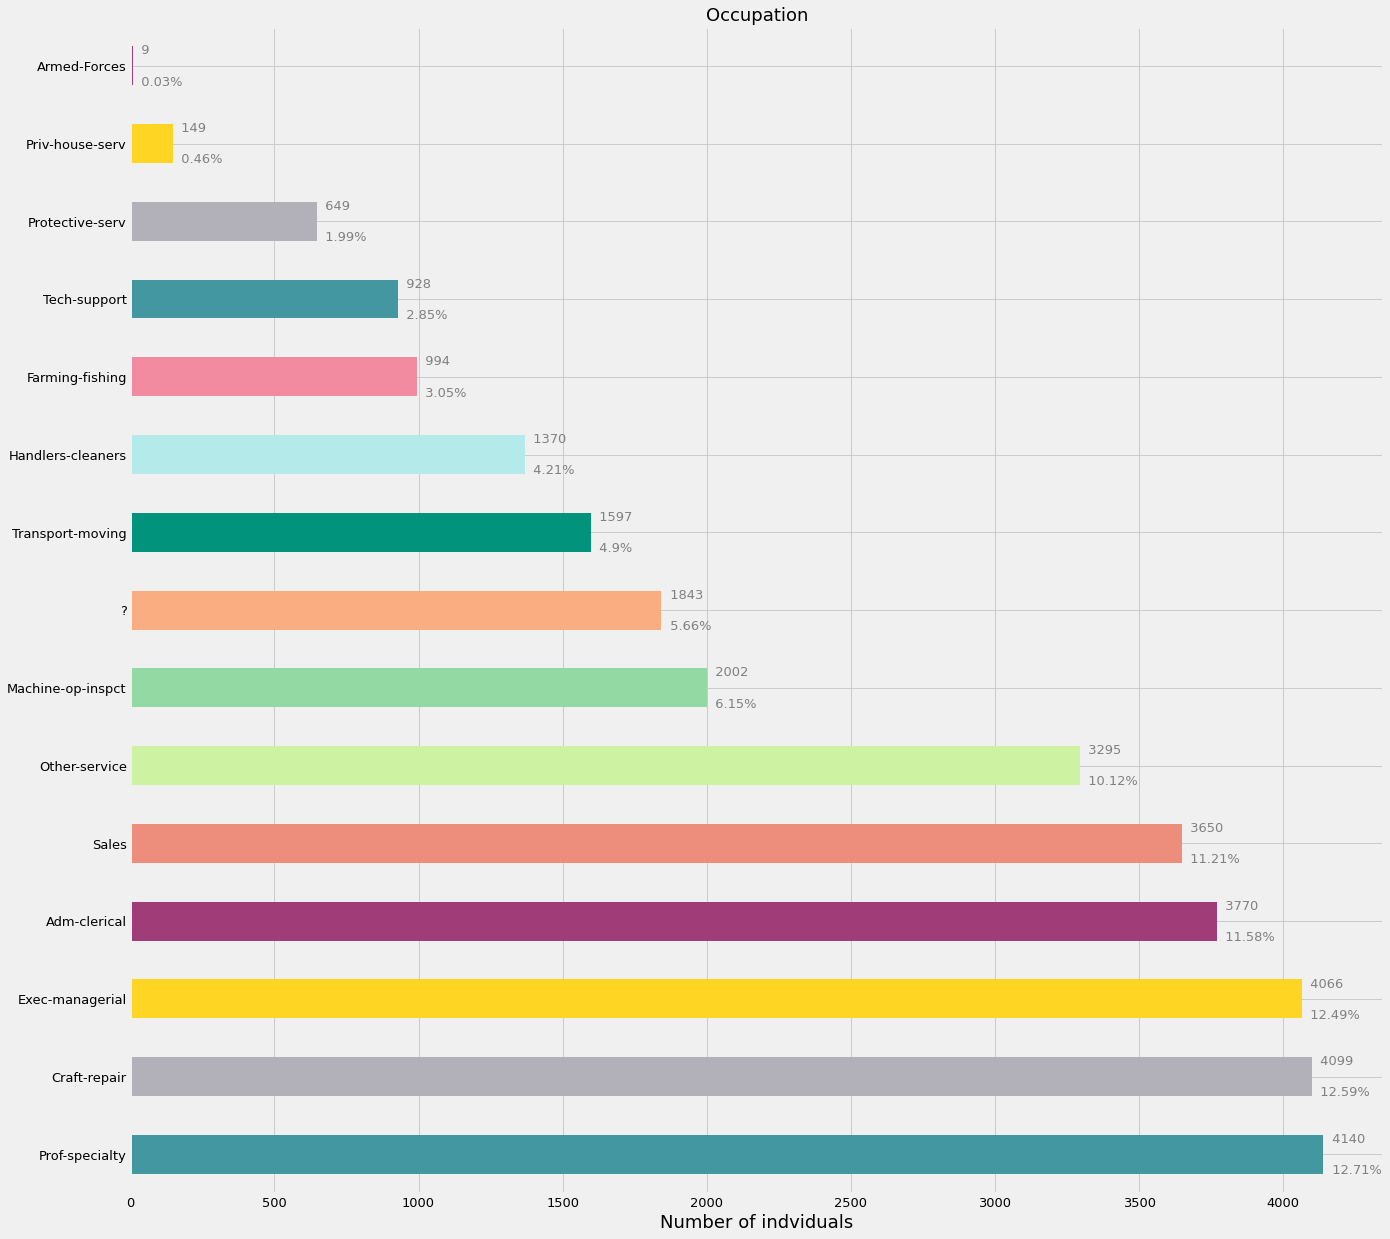

In [23]:
occupation_data_barh_graph = dataframe['occupation'].value_counts().plot(kind='barh', color=['#4297A0','#B2B1B9','#FFD523','#A03C78','#ED8E7C','#CDF3A2','#93D9A3','#FAAD80','#01937C','#B5EAEA','#F38BA0'], fontsize=13,figsize=(20,20));
occupation_data_barh_graph.set_title("Occupation", fontsize=18)
occupation_data_barh_graph.set_xlabel("Number of indviduals", fontsize=18);
totals = []
for i in occupation_data_barh_graph.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in occupation_data_barh_graph.patches:
    occupation_data_barh_graph.text(i.get_width()+.4, i.get_y()+.4, \
            "  "+str(round(i.get_width())), fontsize=13,color='grey')
for i in occupation_data_barh_graph.patches:
    occupation_data_barh_graph.text(i.get_width()+.20, i.get_y(), \
            "  "+str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,color='grey')
plt.style.use('fivethirtyeight')

<hr>
<h1>Gaussian Distributions</h1>

<h2>Gaussian Distribution of hours worked per week</h2>

Average hours worked per week: 40.437455852092995


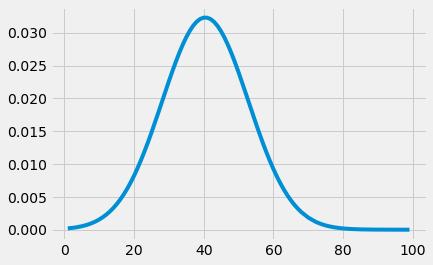

In [24]:
hours_per_week= dataframe['hours-per-week'].to_list()
hours_per_week.sort()
hours_per_week_mean= np.mean(hours_per_week)
hours_per_week_std = np.std(hours_per_week)
pdf = stats.norm.pdf(hours_per_week, hours_per_week_mean, hours_per_week_std)
plt.plot(hours_per_week, pdf)
plt.style.use('fivethirtyeight')  
print("Average hours worked per week: "+str(dataframe['hours-per-week'].mean()))

<h2>Gaussian Distribution of hours worked per week where salary is over 50k</h2>

Average hours worked per week were salary is greater than 50k: 45.473026399693914


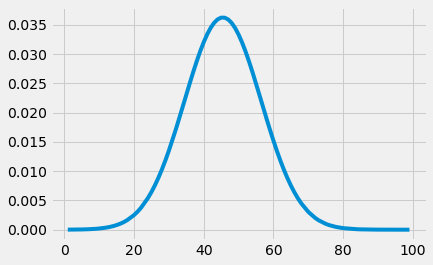

In [25]:
hours_per_week_salary_over_50k = dataframe['hours-per-week'][dataframe['salary']=='>50K'].to_list()
hours_per_week_salary_over_50k.sort()
hours_per_week_salary_over_50k_mean= np.mean(hours_per_week_salary_over_50k)
hours_per_week_salary_over_50k_std = np.std(hours_per_week_salary_over_50k)
pdf = stats.norm.pdf(hours_per_week_salary_over_50k, hours_per_week_salary_over_50k_mean, hours_per_week_salary_over_50k_std)
plt.plot(hours_per_week_salary_over_50k, pdf)
plt.style.use('fivethirtyeight')  
print("Average hours worked per week were salary is greater than 50k: "+str(dataframe['hours-per-week'][dataframe['salary']=='>50K'].mean()))

<h2>Gaussian Distribution of hours worked per week where salary is under or equal 50k</h2>

Average hours worked per week were salary is less than or equal to 50k: 38.840210355987054


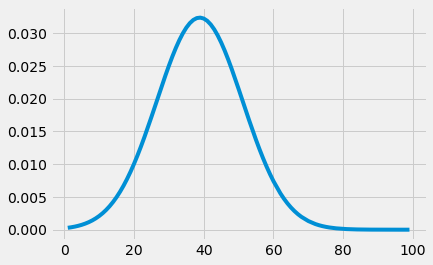

In [26]:
hours_per_week_salary_under_50k = dataframe['hours-per-week'][dataframe['salary']=='<=50K'].to_list()
hours_per_week_salary_under_50k.sort()
hours_per_week_salary_under_50k_mean= np.mean(hours_per_week_salary_under_50k)
hours_per_week_salary_under_50k_std = np.std(hours_per_week_salary_under_50k)
pdf = stats.norm.pdf(hours_per_week_salary_under_50k,hours_per_week_salary_under_50k_mean, hours_per_week_salary_under_50k_std)
plt.plot(hours_per_week_salary_under_50k, pdf)
plt.style.use('fivethirtyeight') 
print("Average hours worked per week were salary is less than or equal to 50k: "+str(dataframe['hours-per-week'][dataframe['salary']=='<=50K'].mean()))

<h2>Gaussian Distribution of hours worked per week where salary is over 50k and individual has obtained a degree of some sort (Bachelors or Masters or Doctorate)</h2>

Average hours worked per week were salary is greater than 50k and individual has obtained a degree: 45.77596098680436
<ipython-input-27-84119caf7943>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hours_per_week_salary_over_50k_educated = dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K']['hours-per-week'].to_list()
<ipython-input-27-84119caf7943>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Average hours worked per week were salary is greater than 50k and individual has obtained a degree: "+str(dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K']['hours-per-week'].mean()))


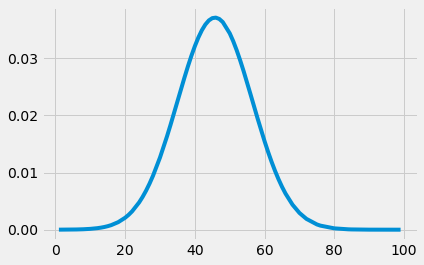

In [27]:
hours_per_week_salary_over_50k_educated = dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K']['hours-per-week'].to_list()
hours_per_week_salary_over_50k_educated.sort()
hours_per_week_salary_over_50k_educated_mean= np.mean(hours_per_week_salary_over_50k_educated)
hours_per_week_salary_over_50k_educated_std = np.std(hours_per_week_salary_over_50k_educated)
pdf = stats.norm.pdf(hours_per_week_salary_over_50k_educated,hours_per_week_salary_over_50k_educated_mean, hours_per_week_salary_over_50k_educated_std)
plt.plot(hours_per_week_salary_over_50k_educated, pdf)
plt.style.use('fivethirtyeight') 
print("Average hours worked per week were salary is greater than 50k and individual has obtained a degree: "+str(dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K']['hours-per-week'].mean()))

<h2>Gaussian Distribution of hours worked per week where salary is under or equal to 50k and individual has obtained a degree of some sort (Bachelors or Masters or Doctorate)</h2>

<ipython-input-28-a62d17cb7b50>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hours_per_week_salary_under_50k_educated = dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '<=50K']['hours-per-week'].to_list()
<ipython-input-28-a62d17cb7b50>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Average hours worked per week were salary is greater than 50k and individual has obtained a degree: "+str(dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '<=50K']['hours-per-week'].mean()))
Average hours worked per week were salary is greater than 50k and individual has obtained a degree: 40.83720349563046


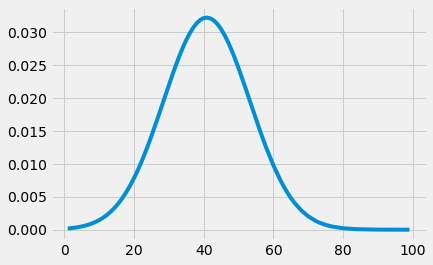

In [28]:
hours_per_week_salary_under_50k_educated = dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '<=50K']['hours-per-week'].to_list()
hours_per_week_salary_under_50k_educated .sort()
hours_per_week_salary_under_50k_educated_mean= np.mean(hours_per_week_salary_under_50k_educated)
hours_per_week_salary_under_50k_educated_std = np.std(hours_per_week_salary_under_50k_educated)
pdf = stats.norm.pdf(hours_per_week_salary_under_50k_educated,hours_per_week_salary_under_50k_educated_mean, hours_per_week_salary_under_50k_educated_std)
plt.plot(hours_per_week_salary_under_50k_educated, pdf)
plt.style.use('fivethirtyeight') 
print("Average hours worked per week were salary is greater than 50k and individual has obtained a degree: "+str(dataframe.loc[dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '<=50K']['hours-per-week'].mean()))

<h2>Gaussian Distribution of hours worked per week where salary is over 50k and individual has not obtained a degree of some sort (Bachelors or Masters or Doctorate)</h2>

<ipython-input-29-a6f0b91294f0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hours_per_week_salary_over_50k_noneducated = dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K']['hours-per-week'].to_list()
<ipython-input-29-a6f0b91294f0>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Average hours worked per week were salary is greater than 50k and individual has obtained a degree: "+str(dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K']['hours-per-week'].mean()))
Average hours worked per week were salary is greater than 50k and individual has obtained a degree: 45.23053960964409


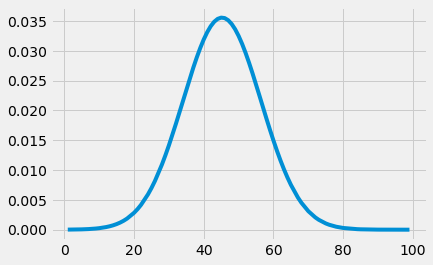

In [29]:
hours_per_week_salary_over_50k_noneducated = dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K']['hours-per-week'].to_list()
hours_per_week_salary_over_50k_noneducated.sort()
hours_per_week_salary_over_50k_noneducated_mean= np.mean(hours_per_week_salary_over_50k_noneducated)
hours_per_week_salary_over_50k_noneducated_std = np.std(hours_per_week_salary_over_50k_noneducated)
pdf = stats.norm.pdf(hours_per_week_salary_over_50k_noneducated,hours_per_week_salary_over_50k_noneducated_mean, hours_per_week_salary_over_50k_noneducated_std)
plt.plot(hours_per_week_salary_over_50k_noneducated, pdf)
plt.style.use('fivethirtyeight') 
print("Average hours worked per week were salary is greater than 50k and individual has obtained a degree: "+str(dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '>50K']['hours-per-week'].mean()))

<h2>Gaussian Distribution of hours worked per week where salary is under or equal to 50k and individual has not obtained a degree of some sort (Bachelors or Masters or Doctorate)</h2>

<ipython-input-30-15a35d975776>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hours_per_week_salary_under_50k_noneducated = dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '<=50K']['hours-per-week'].to_list()
<ipython-input-30-15a35d975776>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Average hours worked per week were salary is greater than 50k and individual has obtained a degree: "+str(dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '<=50K']['hours-per-week'].mean()))
Average hours worked per week were salary is greater than 50k and individual has obtained a degree: 38.45411537533189


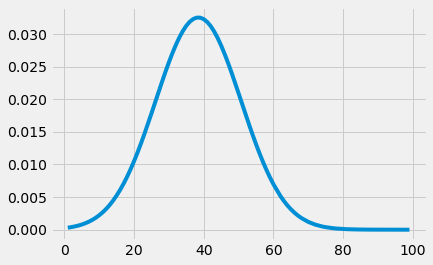

In [30]:
hours_per_week_salary_under_50k_noneducated = dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '<=50K']['hours-per-week'].to_list()
hours_per_week_salary_under_50k_noneducated.sort()
hours_per_week_salary_under_50k_noneducated_mean= np.mean(hours_per_week_salary_under_50k_noneducated)
hours_per_week_salary_under_50k_noneducated_std = np.std(hours_per_week_salary_under_50k_noneducated)
pdf = stats.norm.pdf(hours_per_week_salary_under_50k_noneducated,hours_per_week_salary_under_50k_noneducated_mean, hours_per_week_salary_under_50k_noneducated_std)
plt.plot(hours_per_week_salary_under_50k_noneducated, pdf)
plt.style.use('fivethirtyeight') 
print("Average hours worked per week were salary is greater than 50k and individual has obtained a degree: "+str(dataframe.loc[~dataframe['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][dataframe['salary']== '<=50K']['hours-per-week'].mean()))